In [155]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# pyqubo imports
from pyqubo import Binary, Spin
from pprint import pprint
from dimod import ExactSolver

#myqlm imports
from qat.lang.AQASM import *
from qat.lang.AQASM import *
from qat.qpus import get_default_qpu
import import_ipynb
import ipynb

import networkx as nx
import matplotlib.pyplot as plt

from QAOAutils import SolverQAOA

# Problema do Clique

O Problema do Clique consiste em encontrar um subgrafo completo, $\hat{G}$, composto por $K$ vértices (nós), em um dado grafo $G(V,E)$. Um grafo é completo quando todos os seus vértices nós interconectados. Na figura abaixo, podemos ver um grafo e seu respectivo clique de tamanho $K=4$.

<img src="grafo_clique.png" width=750 />



É possível verificar que o conjunto dos vértices $|V_c| = \{0,1,2,3\} $ formam um clique de tamanho $K=4$, pois formam um grafo completo. 

## Formulação como Otimização Irrestrita

Formularemos o problema como uma função de otimização com variáveis binárias, $x_i \in \{0,1\}$, sendo que o "estado" de cada vértice é dado por $x_i$. Se $x_i = 1$, indica que o vértice de índice $i$ faz parte do clique. A solução do exemplo com o grafo apresentado anteriormente é dada por $\vec{x} = 11110$, visto que apenas o vértice $4$ não faz parte do clique.

Apresentaremos dois termos de penalidades necessários para escrever o Problema do Clique como Otimização Irrestrita. Um dos termos está relacionado ao fato de que o número de vértices no estado $x_i = 1$ deve ser igual a $K$. Para isso, criamos o termo

$$ H_a = \left(K - \sum_{i=0}^{N}x_i\right)^2. $$

Quanto maior a diferença entre $K$ e o número de vértices em estado $1$, maior será a penalidade na função objetivo. O valor de $H_a$ será $0$ (mínimo) quando o critério for atendido. Contudo, claramente, essa condição não é suficiente para garantir que o clique seja encontrado. Para isso, introduziremos outros conceitos, começando pela quantidade de vértices em um clique. Essa quantidade é dada por

$$C = \frac{K(K-1)}{2}.$$

Logo, introduziremos um novo termo na função objetivo, cujo papel desempenhado é o de penalizar a função caso o número de arestas do subgrafo que conectam os nós de estado $x_i = 1$ seja diferente de $C$. Queremos que a quantidade de arestas do clique seja igual a $C$, logo, criamos o seguinte termo:

$$H_b = C - \sum_{<ij>}x_ix_j$$
onde $<ij>$ representa os índices apenas dos vértices conectados entre si. Introduziremos ainda as variáveis de penalidade dadas por $A$ e $B$, que são números inteiros usados para controlar a função objetivo e garantir que as restrições serão atendidas, pois podera as penalidades. Sendo assim, a função objetivo final é dada por 

$$H = A\left(K - \sum_{i=0}^{N}x_i\right)^2 + B\left( C - \sum_{<ij>}x_ix_j\right).$$

Neste problema, devemos considerar as constantes de penalidade satisfaznedo $A > B$.

### Exercício 1:

Vamos codificar o grafo da figura anterior e desenhá-lo usando a framework `Networkx`.
Substitua a resposta correta pelos 2 FIXMEs no código abaixo.

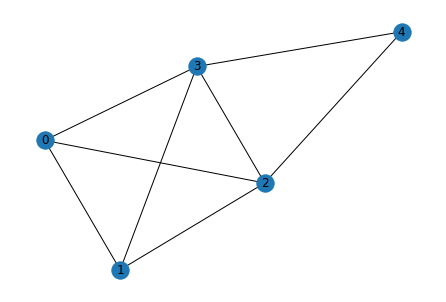

In [156]:
#Criando um grafo G
G = nx.Graph()
num_nodes = 5
# crie uma lista com os indices de cada nó
nodes = [i for i in range(num_nodes)]
# crie uma estrutura que codifique o grafo
# crie uma lista de tuplas com os nos vizinhos: g=[..., (ni,nj),...]
g = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4)]

G.add_edges_from(g)
nx.draw(G, with_labels=True)
plt.show()

### Exercício 2:

Agora, defina os parâmetros do problema. Note que queremos encontrar um clique de tamanho $K=4$ no grafo dado como exemplo.
Substitua a resposta correta pelos 4 FIXMEs no código abaixo.

In [157]:
# -----------------
# parametros do problema
# -----------------

# defina o tamanho do clique
K= 3
# numero de nos do grafo
num_nodes = len(nodes)
# numero de arestas no clique
C = K*(K-1)/2
# penalidades para Ha e Hb
A,B = 4,1

print(f"Tamanho do Clique: {K} \n Número de nós: {num_nodes} \n Número de arestas no Clique: {C} \n Constantes de penalidade: {A} e {B}.")


Tamanho do Clique: 3 
 Número de nós: 5 
 Número de arestas no Clique: 3.0 
 Constantes de penalidade: 4 e 1.


### Exercício 3:

Escreva a função objetivo inteira em termos das variáveis binárias `Binary('xi')` do Pyqubo.
Substitua a resposta correta pelos 6 FIXMEs no código abaixo.

In [158]:
# ----------------------------------------
# criando as variaveis binarias com pyqubo
# ----------------------------------------

# criando o termo Ha
x_sum = 0 
for i in nodes:
    x_sum += Binary("x" + str(i))

Ha = (K - x_sum)**2

# criando o termo Hb
quadratic_terms_sum = 0
for edge in g:
    quadratic_terms_sum += Binary("x" + str(edge[0]))*Binary("x" + str(edge[1]))

Hb = C - quadratic_terms_sum

# escreva a função objetivo
H = A*Ha + B*Hb

model = H.compile()

### Exercício 4:

Crie o objeto `qaoa`, através da classe SolverQAOA, com seus argumentos declarados corretamente.
Substitua a resposta correta pelos 4 FIXMEs no código abaixo.

In [159]:
qaoa = SolverQAOA(binary_model = model, num_variables = 5, num_measurements = 1000, depth=4)

### Exercício 5:

Crie o circuito para operador de fase do QAOA e atribua um parametro qualquer no intervalo [0, pi].
Substitua a resposta correta pelo FIXME no código abaixo.

In [160]:
phase_circuit = qaoa.phase_op(gamma = np.pi)
%qatdisplay phase_circuit --svg

UsageError: Line magic function `%qatdisplay` not found.


### Exercício 6:

Crie o circuito para operador mixer do QAOA e atribua um parametro qualquer no intervalo [0, pi].
Substitua a resposta correta pelo FIXME no código abaixo.

In [161]:
mix_circuit = qaoa.mixer_op(np.pi)
%qatdisplay mix_circuit --svg

UsageError: Line magic function `%qatdisplay` not found.


### Exercício 7:

Defina um chute inicial para os parametros variacionais de todo o circuito, baseado na profundidade do circuito `depth`. Através do método `full_circuit_measurements`, crie o circuito completo e as `num_measurements` medidas para o chute incicial.
Substitua a resposta correta pelos 2 FIXMEs no código abaixo.

In [162]:
# camada única do QAOA e medidas para chute inicial de gamma e beta
initial_guess = np.random.uniform(0,np.pi,8)
full_circ, initial_meas = qaoa.full_circuit_measurements(initial_guess)
%qatdisplay full_circ --svg

UsageError: Line magic function `%qatdisplay` not found.


<BarContainer object of 32 artists>

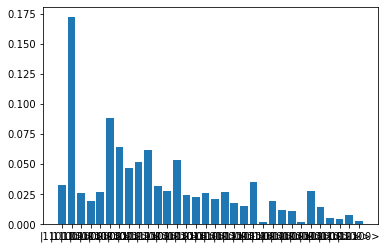

In [163]:
states=[]; probs = []
for key, value in initial_meas.items():
    states.append(str(key))
    probs.append(value)

plt.bar(states, probs)

In [164]:
print(states)
print(probs)

['|11011>', '|11001>', '|10110>', '|11000>', '|01101>', '|00001>', '|00100>', '|00110>', '|01111>', '|11110>', '|11101>', '|01011>', '|00010>', '|00101>', '|10101>', '|01110>', '|01001>', '|10011>', '|10000>', '|11111>', '|10111>', '|01100>', '|10001>', '|01000>', '|10010>', '|11010>', '|00111>', '|00011>', '|00000>', '|01010>', '|10100>', '|11100>']
[0.033, 0.172, 0.026, 0.019, 0.027, 0.088, 0.064, 0.047, 0.052, 0.062, 0.032, 0.028, 0.053, 0.024, 0.023, 0.026, 0.021, 0.027, 0.018, 0.015, 0.035, 0.002, 0.019, 0.012, 0.011, 0.002, 0.028, 0.014, 0.005, 0.004, 0.008, 0.003]


### Exercício 8:

Através do método `cost_function`, calcule as funções custo individuais para as soluções '00001' e '11100'. Interprete os resultados. Supondo que tenhamos realizado 10 medidas no circuito quântico e os autoestados medidos fossem justamente '00001' 2 vezes e '11100' 8 vezes, qual seria a estimativa para o valor esperado nesse caso?
Substitua a resposta correta pelo FIXME no código abaixo.

In [165]:
# cada energia relacionada a um autoestado
# exemplo:
energy_00001 = qaoa.cost_function('00001')

energy_11100 = qaoa.cost_function('11100')

print("Energia associada ao autoestado |11100>:  ", energy_11100, "\n",70*"#")
print("Energia associada ao autoestado |00001>:  ", energy_00001, "\n",70*"#")

exp_value_00001_11100 =  (energy_00001*2 + energy_11100*8)/10

print("Valor esperado das 10 medidas hipoteticas:  ", exp_value_00001_11100, "\n",70*"#")

Energia associada ao autoestado |11100>:   -39.0 
 ######################################################################
Energia associada ao autoestado |00001>:   -20.0 
 ######################################################################
Valor esperado das 10 medidas hipoteticas:   -35.2 
 ######################################################################


### Exercício 9:

Através do método `expected_value`, calcule o valor esperado para o número de medidas `num_measurements` que voce escolheu. Note que o argumento do método é o `initial_guess`.
Substitua a resposta correta pelo FIXME no código abaixo.

In [166]:
# valor esperado de energia <psi|H|psi> para os chutes iniciais:
exp_val = qaoa.expected_value(initial_guess)
print(" \n \n Valor esperado de energia para o chute inicial:  ", exp_val, "\n",70*"#")

 
 
 Valor esperado de energia para o chute inicial:   -32.219 
 ######################################################################


In [167]:
# Rodando o algoritmo com o método run()
res = qaoa.run()

c:\Users\55229\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:548: RuntimeWarning: Method COBYLA does not support callback.
  warn('Method %s does not support callback.' % method, RuntimeWarning)
c:\Users\55229\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:629: OptimizeWarning: Unknown solver options: ftol, iprint, eps, finite_diff_rel_step
  return _minimize_cobyla(fun, x0, args, constraints, **options)



 
 QAOA solution:  |11111>
Pyqubo solution:  {'x0': 0, 'x1': 0, 'x2': 1, 'x3': 1, 'x4': 1}


### Exercício 10:

Repita o experimento algumas vezes para $K=3$. Comente os resultados.